## Business Problem:
To ensure there is no discrimination between employees, it is imperative for the Human Resources 
department of "Delta Ltd." to maintain a salary range for each employee with similar profiles.
Apart from the existing salary, there is a considerable number of factors regarding an employee’s 
experience and other abilities to which they get evaluated in interviews.
Given the data related to individuals who applied in Delta Ltd, models can be built that can automatically determine salary 
which should be offered if the prospective candidate is selected in the company. This model seeks to 
minimize human judgment with regard to salary to be offered.


Goal & Objective: The objective of this exercise is to build a model, using historical data that will 
determine an employee's salary to be offered, such that manual judgments on selection are 
minimized. It is intended to have a robust approach and eliminate any discrimination in salary 
among similar employee profiles

In [1]:
# Import packages
import numpy       as np
import pandas      as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
hd=pd.read_csv("expected_ctc.csv",na_values="", keep_default_na=False)
hd.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NA,NA,NA,NA,NA,PG,...,Guwahati,Pune,0,N,NA,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [3]:
hd.shape

(25000, 29)

In [4]:
hd.size

725000

In [5]:

#filling empty cells and NA with nan

hd=hd.replace(r'^\s*$', float(np.NaN), regex=True)

hd=hd.replace('NA', float(np.NaN), regex=True)


In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

TARGET VARIABLE: 
Expected_CTC
    
DATA DICTIONARY:
IDX : Index

Applicant_ID: Application ID

Total_Experience:  Total industry experience

Total_Experience_in_field_applied:Total experience in the field applied for (past work experience that 
is relevant to the job)

Department : Department name of current company

Role : Role in the current company

Industry : Industry name of current field

Organization : Organization name

Designation:  Designation in current company

Education :Education

Graduation_Specialization :Specialization subject in graduation

University_Grad : University or college in Graduation

Passing_Year_Of_Graduation :Year of passing Graduation

PG_Specialization : Specialization subject in Post-Graduation

University_PG : University or college in Post-Graduation

Passing_Year_Of_PG : Year of passing Post Graduation

PHD_Specialization :Specialization subject in Post-Graduation

University_PHD : University or college in Post Doctorate

Passing_Year_Of_PHD: Year of passing PHD

Curent_Location: Curent Location

Preferred_location: Preferred location to work in the company applied

Current_CTC: Current CTC

Inhand_Offer: Holding any offer in hand (Y: Yes, N:No)

Last_Appraisal_Rating: Last Appraisal Rating in current company

No_Of_Companies_worked: No. of companies worked till date

Number_of_Publications: Number of papers published

Certifications : Number of relevant certifications completed

International_degree_any : Hold any international degree (1: Yes, 0: No)

Expected_CTC: Expected CTC (Final CTC offered by Delta Ltd.)
    

In [7]:
hd.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


In [8]:
hd.describe(include='object').T

,count,unique,top,freq
Department,22222,12,Marketing,2379
Role,24037,24,Others,2248
Industry,24092,11,Training,2237
Organization,24092,16,M,1574
Designation,21871,18,HR,1648
Education,25000,4,PG,6326
Graduation_Specialization,18820,11,Chemistry,1785
University_Grad,18820,13,Bhubaneswar,1510
PG_Specialization,17308,11,Mathematics,1800
University_PG,17308,13,Bhubaneswar,1377


In [9]:
hd.isnull().sum()      #NULL VALUES CHECK

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Apprai

In [10]:
dups = hd.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))    #no duplicated records
print(hd.shape)

Number of duplicate rows = 0
(25000, 29)


MISSING VALUES CHECK

['Department', 'Role', 'Industry', 'Organization', 'Designation', 'Graduation_Specialization', 'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization', 'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization', 'University_PHD', 'Passing_Year_Of_PHD', 'Last_Appraisal_Rating']


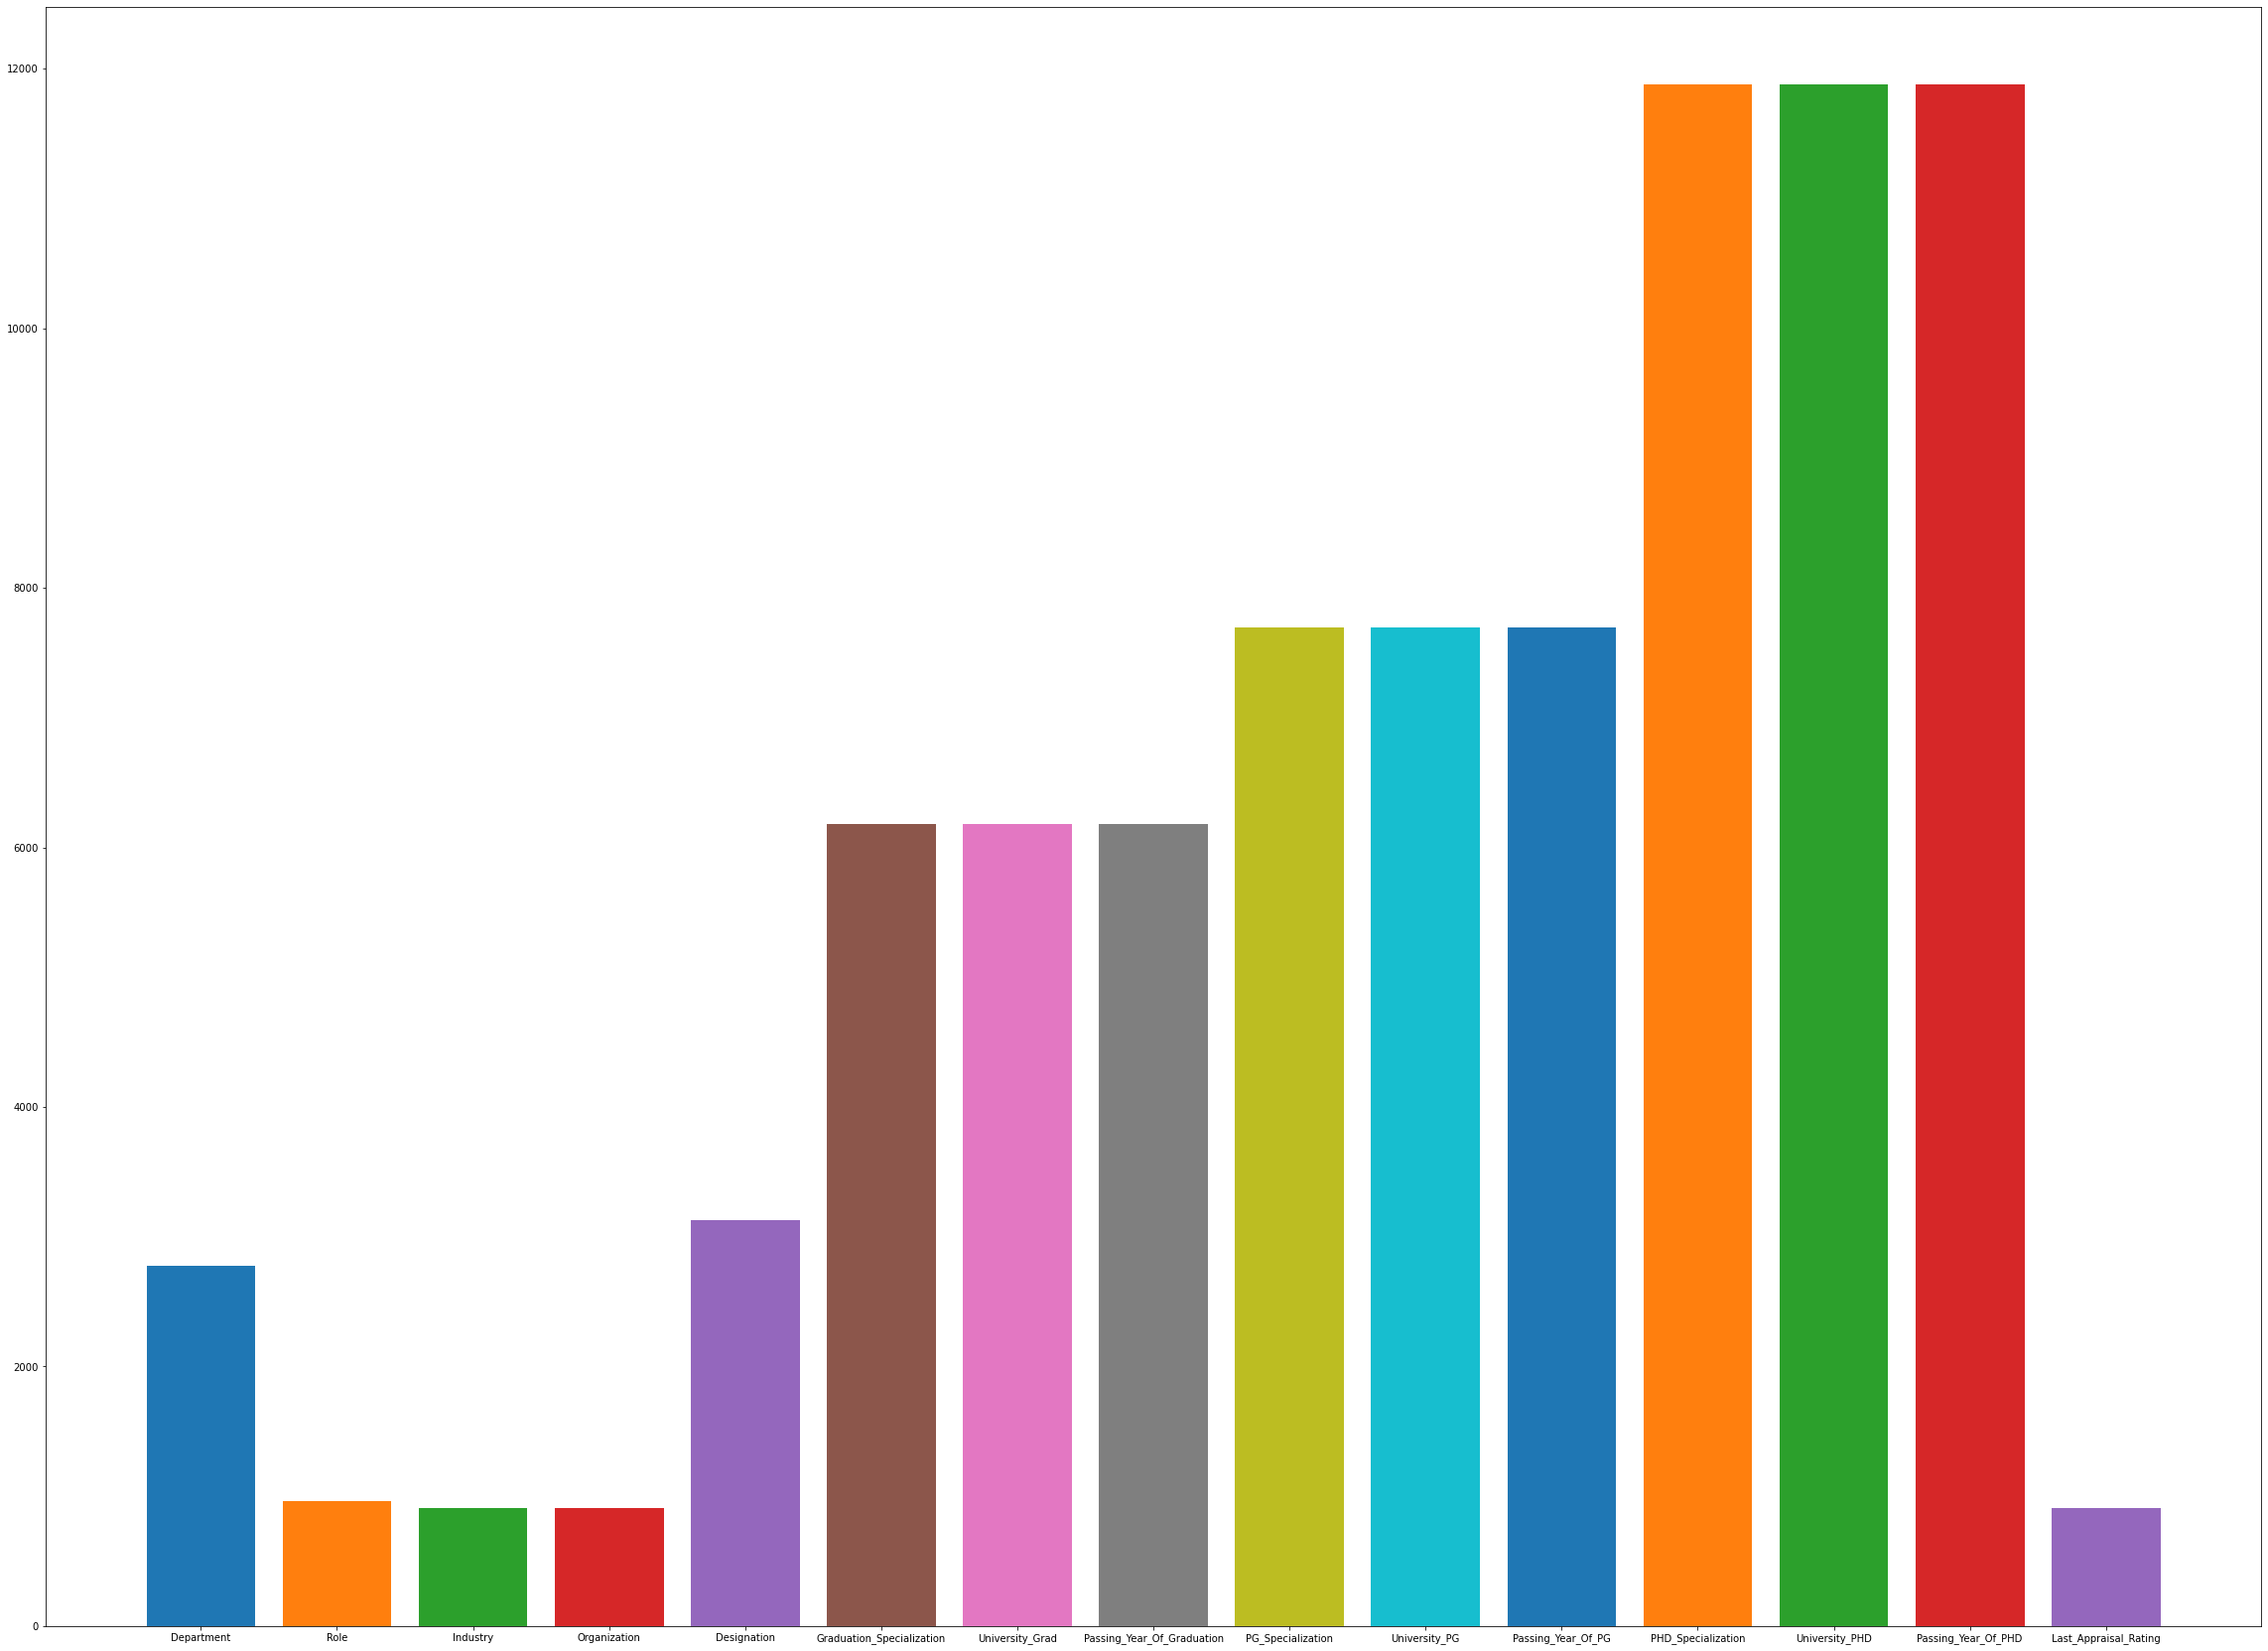

In [11]:
#sns.countplot(df.isnull()) # drawing heat map to see the distribution of nan value present.

#visualization of missing features

fig, ax = plt.subplots(figsize=(40,30))

missing_val_features=[each for each in hd.columns if hd[each].isnull().sum()>1]

#printing features that have missing values
print(missing_val_features)
#for loop to interate through features and plotting a bar chart
 
for feature in missing_val_features:
    height=hd[feature].isnull().sum()
    plt.bar(feature,height)


In [12]:
# % OF MISSING VALUES
    
total = hd.isnull().sum().sort_values(ascending=False) #initializing sum of null value to total
percent_1 = (hd.isnull().sum()/hd.isnull().count()*100)  #caluculating total percentage of null values to percent_1.
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) #sorting percentage of null value in ascending order.
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) # joining two column.
missing_data


,Total,%
Passing_Year_Of_PHD,11881,47.5
University_PHD,11881,47.5
PHD_Specialization,11881,47.5
University_PG,7692,30.8
Passing_Year_Of_PG,7692,30.8
PG_Specialization,7692,30.8
University_Grad,6180,24.7
Passing_Year_Of_Graduation,6180,24.7
Graduation_Specialization,6180,24.7
Designation,3129,12.5


### Converting some variables from numerical to categorical

In [13]:
hd['No_Of_Companies_worked'] = pd.Categorical(hd.No_Of_Companies_worked)
hd['Number_of_Publications'] = pd.Categorical(hd.Number_of_Publications)
hd['Certifications'] = pd.Categorical(hd.Certifications)
hd['International_degree_any'] = pd.Categorical(hd.International_degree_any)
hd.dtypes

IDX                                     int64
Applicant_ID                            int64
Total_Experience                        int64
Total_Experience_in_field_applied       int64
Department                             object
Role                                   object
Industry                               object
Organization                           object
Designation                            object
Education                              object
Graduation_Specialization              object
University_Grad                        object
Passing_Year_Of_Graduation            float64
PG_Specialization                      object
University_PG                          object
Passing_Year_Of_PG                    float64
PHD_Specialization                     object
University_PHD                         object
Passing_Year_Of_PHD                   float64
Curent_Location                        object
Preferred_location                     object
Current_CTC                       

### Removing Redundant columns

In [14]:
hd = hd.drop(['IDX','Applicant_ID'],axis=1)
hd.head()                  


,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


### UNIVARIATE ANALYSIS

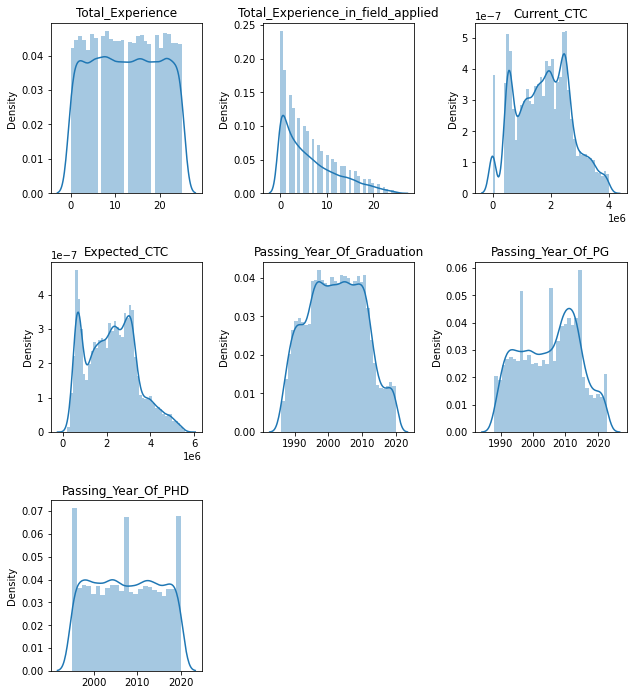

In [15]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.9,wspace=0.4,hspace=0.4)
plt.subplot(3,3,1)
sns.distplot(x=hd.Total_Experience,kde=True).set(title='Total_Experience');
plt.subplot(3,3,2)
sns.distplot(x=hd.Total_Experience_in_field_applied,kde=True).set(title='Total_Experience_in_field_applied');
plt.subplot(3,3,3)
sns.distplot(x=hd.Current_CTC,kde=True).set(title='Current_CTC');
plt.subplot(3,3,4)
sns.distplot(x=hd.Expected_CTC,kde=True).set(title='Expected_CTC');
plt.subplot(3,3,5)
sns.distplot(x=hd.Passing_Year_Of_Graduation,kde=True).set(title='Passing_Year_Of_Graduation');
plt.subplot(3,3,6)
sns.distplot(x=hd.Passing_Year_Of_PG,kde=True).set(title='Passing_Year_Of_PG');
plt.subplot(3,3,7)
sns.distplot(x=hd.Passing_Year_Of_PHD,kde=True).set(title='Passing_Year_Of_PHD');



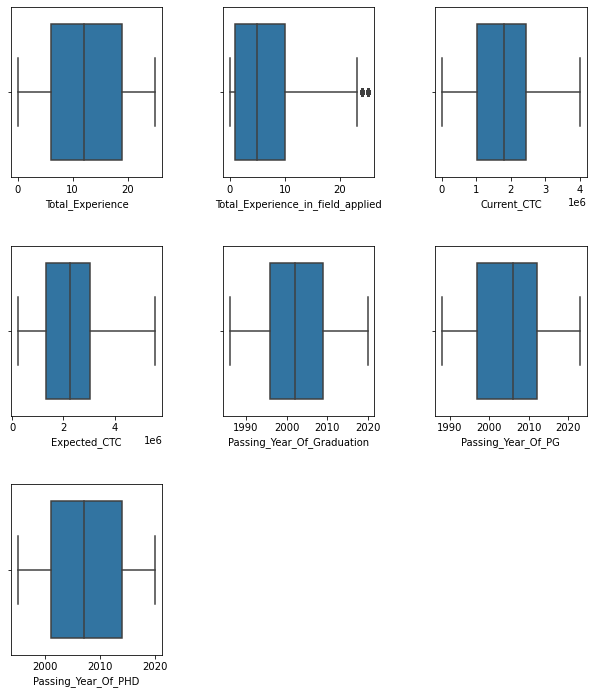

In [16]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.9,wspace=0.4,hspace=0.4)
plt.subplot(3,3,1)
sns.boxplot(x=hd.Total_Experience);
plt.subplot(3,3,2)
sns.boxplot(x=hd.Total_Experience_in_field_applied);
plt.subplot(3,3,3)
sns.boxplot(x=hd.Current_CTC);
plt.subplot(3,3,4)
sns.boxplot(x=hd.Expected_CTC);
plt.subplot(3,3,5)
sns.boxplot(x=hd.Passing_Year_Of_Graduation);
plt.subplot(3,3,6)
sns.boxplot(x=hd.Passing_Year_Of_PG);
plt.subplot(3,3,7)
sns.boxplot(x=hd.Passing_Year_Of_PHD);


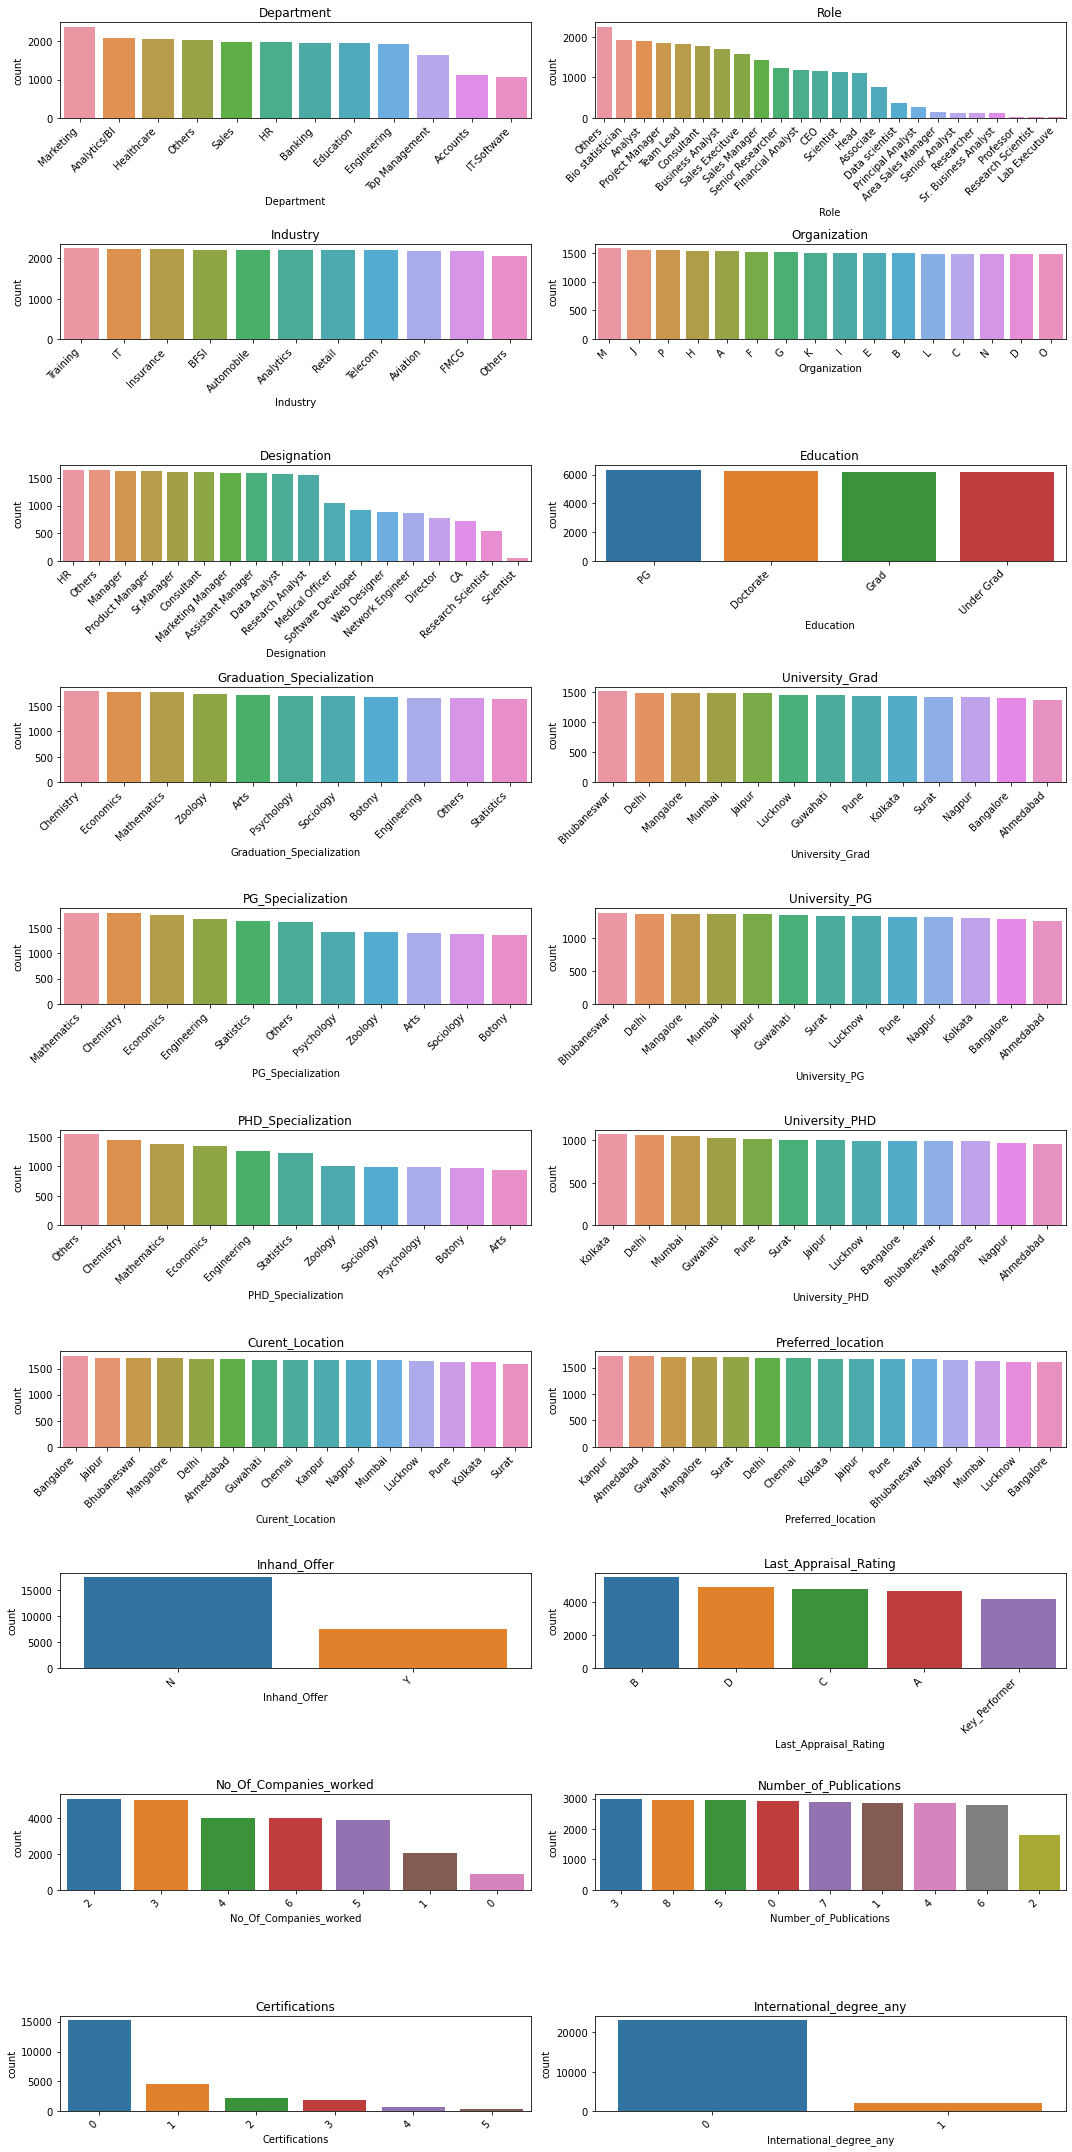

In [17]:
cat_vars = ['Department', 'Role', 'Industry', 'Organization', 'Designation', 'Education', 'Graduation_Specialization',
            'University_Grad', 'PG_Specialization', 'University_PG', 'PHD_Specialization', 'University_PHD',
            'Curent_Location', 'Preferred_location', 'Inhand_Offer', 'Last_Appraisal_Rating','No_Of_Companies_worked',
            'Number_of_Publications','Certifications','International_degree_any']

plt.figure(figsize=(15, 30))
for i, var in enumerate(cat_vars):
    plt.subplot(10, 2, i+1)
    sns.countplot(data=hd, x=var, order=hd[var].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.title(var)

plt.show()

### MULTIVARIATE ANALYSIS

In [18]:
cor = hd.corr()
cor

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Expected_CTC
Total_Experience,1.000000,0.645135,-0.902931,-0.634718,-1.000000,0.846476,0.816593
Total_Experience_in_field_applied,0.645135,1.000000,-0.581495,-0.410642,-0.648457,0.548017,0.529115
Passing_Year_Of_Graduation,-0.902931,-0.581495,1.000000,0.841074,0.989101,-0.778366,-0.758694
Passing_Year_Of_PG,-0.634718,-0.410642,0.841074,1.000000,0.989101,-0.544691,-0.530964
Passing_Year_Of_PHD,-1.000000,-0.648457,0.989101,0.989101,1.000000,-0.863459,-0.834222
Current_CTC,0.846476,0.548017,-0.778366,-0.544691,-0.863459,1.000000,0.986718
Expected_CTC,0.816593,0.529115,-0.758694,-0.530964,-0.834222,0.986718,1.000000


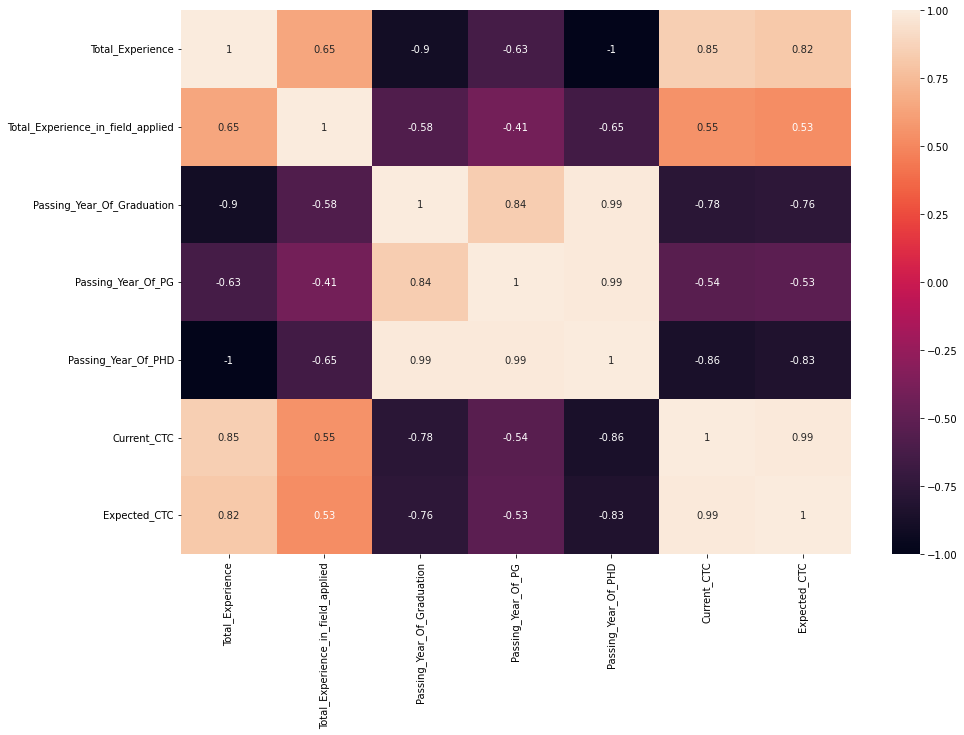

In [19]:
plt.figure(figsize=(15,10))
corr = hd.corr()
sns.heatmap(corr,annot=True);

### Bivariate relationship with target "Expected_CTC"

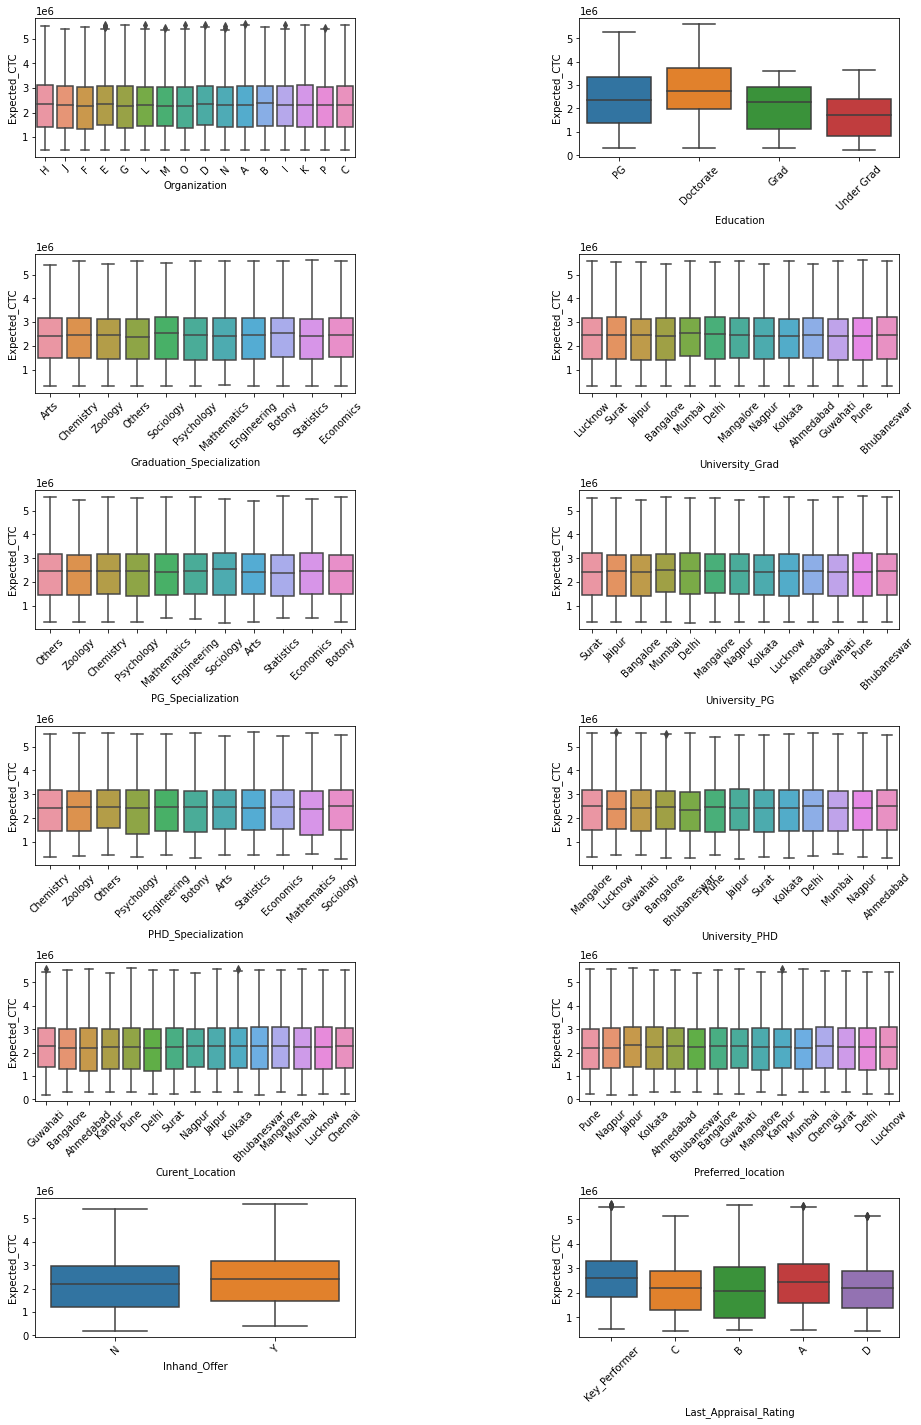

In [20]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.9,wspace=0.7,hspace=0.7)
plt.subplot(7,2,1)
plt.xticks(rotation = 45)
sns.boxplot(x='Organization', y='Expected_CTC', data=hd);
plt.subplot(7,2,2)
plt.xticks(rotation = 45)
sns.boxplot(x='Education', y='Expected_CTC', data=hd);
plt.subplot(7,2,3)
plt.xticks(rotation = 45)
sns.boxplot(x='Graduation_Specialization', y='Expected_CTC', data=hd);
plt.subplot(7,2,4)

plt.xticks(rotation = 45)
sns.boxplot(x='University_Grad', y='Expected_CTC', data=hd);
plt.subplot(7,2,5)

plt.xticks(rotation = 45)
sns.boxplot(x='PG_Specialization', y='Expected_CTC', data=hd);
plt.subplot(7,2,6)

plt.xticks(rotation = 45)
sns.boxplot(x='University_PG', y='Expected_CTC', data=hd);
plt.subplot(7,2,7)

plt.xticks(rotation = 45)
sns.boxplot(x='PHD_Specialization', y='Expected_CTC', data=hd);
plt.subplot(7,2,8)

plt.xticks(rotation = 45)
sns.boxplot(x='University_PHD', y='Expected_CTC', data=hd);
plt.subplot(7,2,9)

plt.xticks(rotation = 45)
sns.boxplot(x='Curent_Location', y='Expected_CTC', data=hd);
plt.subplot(7,2,10)

plt.xticks(rotation = 45)
sns.boxplot(x='Preferred_location', y='Expected_CTC', data=hd);
plt.subplot(7,2,11)

plt.xticks(rotation = 45)
sns.boxplot(x='Inhand_Offer', y='Expected_CTC', data=hd);
plt.subplot(7,2,12)

plt.xticks(rotation = 45)
sns.boxplot(x='Last_Appraisal_Rating', y='Expected_CTC', data=hd);


In [21]:
hd = hd.drop(['Graduation_Specialization','University_Grad','Passing_Year_Of_Graduation',
              'PG_Specialization','University_PG','Passing_Year_Of_PG','PHD_Specialization','University_PHD',
              'Passing_Year_Of_PHD','Curent_Location','Preferred_location','Organization','Current_CTC'],axis=1)
hd.head()   

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,PG,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,NaN,Doctorate,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,N,C,2,3,0,0,2221390


### MISSING VALUE IMPUTATION OF THE COLUMNS LEFT

In [22]:
hd.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Department',
       'Role', 'Industry', 'Designation', 'Education', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

In [23]:
hd["Department"].fillna("Others", inplace = True)
hd["Role"].fillna("Others", inplace = True)
hd["Designation"].fillna("Others", inplace = True)

hd = hd[hd.Total_Experience > 0]
hd.shape

(24092, 14)

In [24]:
hd.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Designation                          0
Education                            0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

In [25]:
for feature in hd.columns: 
    if hd[feature].dtype == 'object': 
        print(feature)
        print(hd[feature].value_counts())
        print('\n')

Department
Others            3911
Marketing         2379
Analytics/BI      2096
Healthcare        2062
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64


Role
Others                  2303
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Professor                 33
Research Scientist        33
Lab Exec

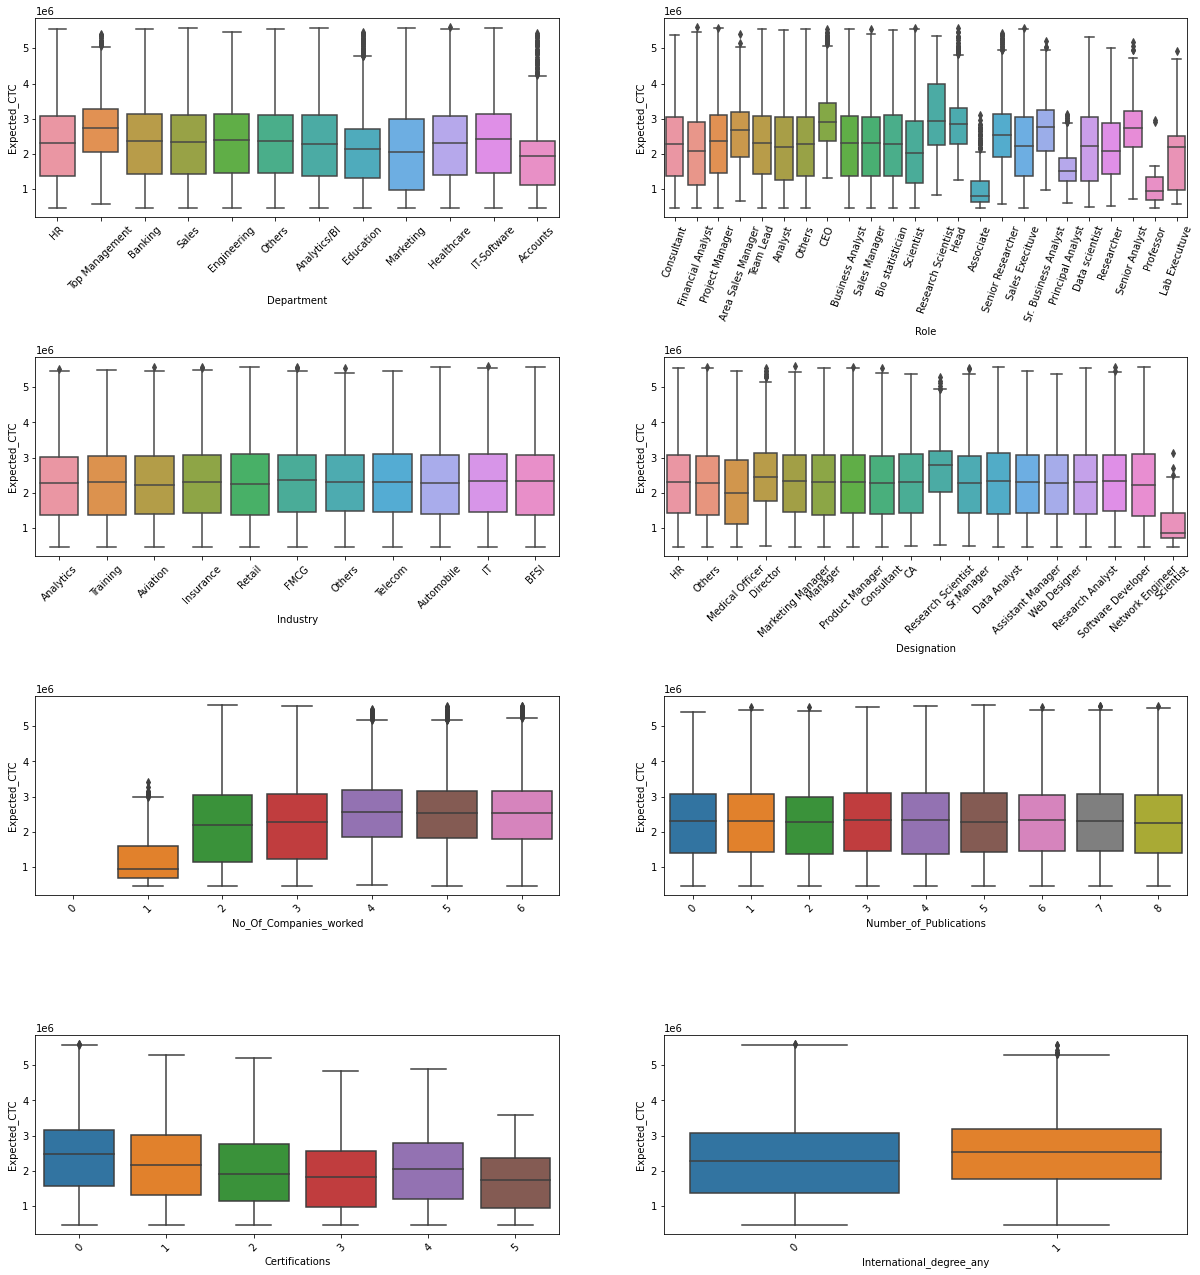

In [26]:
plt.figure(figsize=(20,12))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.9,wspace=0.2,hspace=0.7)
plt.subplot(5,2,1)
plt.xticks(rotation = 45)
sns.boxplot(x='Department', y='Expected_CTC', data=hd);
plt.subplot(5,2,2)
plt.xticks(rotation = 70)
sns.boxplot(x='Role', y='Expected_CTC', data=hd);
plt.subplot(5,2,3)
plt.xticks(rotation = 45)
sns.boxplot(x='Industry', y='Expected_CTC', data=hd);
plt.subplot(5,2,4)
plt.xticks(rotation = 45)
sns.boxplot(x='Designation', y='Expected_CTC', data=hd);
plt.subplot(5,2,5)
plt.xticks(rotation = 45)
sns.boxplot(x='No_Of_Companies_worked', y='Expected_CTC', data=hd);
plt.subplot(5,2,6)
plt.xticks(rotation = 45)
sns.boxplot(x='Number_of_Publications', y='Expected_CTC', data=hd);
plt.subplot(5,2,7)
plt.xticks(rotation = 45)
sns.boxplot(x='Certifications', y='Expected_CTC', data=hd);
plt.subplot(5,2,8)
plt.xticks(rotation = 45)
sns.boxplot(x='International_degree_any', y='Expected_CTC', data=hd);

In [27]:
hd['Department'] = np.where(hd['Department'] =='Education', 'Edu_Acc_Mark', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Accounts', 'Edu_Acc_Mark', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Marketing', 'Edu_Acc_Mark', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Others', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Analytics/BI', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Healthcare', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Sales', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='HR', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Banking', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='Engineering', 'White_Collar', hd['Department'])
hd['Department'] = np.where(hd['Department'] =='IT-Software', 'White_Collar', hd['Department'])
hd.Department.value_counts()

White_Collar      17015
Edu_Acc_Mark       5445
Top Management     1632
Name: Department, dtype: int64

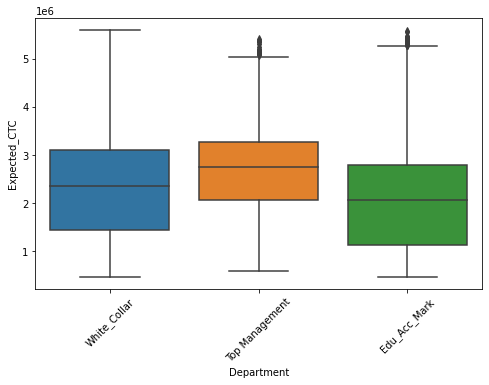

In [28]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.boxplot(x='Department', y='Expected_CTC', data=hd);

In [29]:
hd = hd.drop(['Industry','Role'],axis=1)
hd.head()   

,Total_Experience,Total_Experience_in_field_applied,Department,Designation,Education,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
1,23,14,White_Collar,HR,Doctorate,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Others,Doctorate,Y,Key_Performer,5,3,0,0,3131325
3,15,8,White_Collar,HR,Doctorate,N,C,5,3,0,0,2608833
4,10,5,White_Collar,Medical Officer,Grad,N,C,2,3,0,0,2221390
5,16,3,Top Management,Director,Doctorate,Y,C,5,4,0,0,4522383


In [30]:
hd = hd.drop(['Number_of_Publications'],axis=1)
hd.head() 

,Total_Experience,Total_Experience_in_field_applied,Department,Designation,Education,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Certifications,International_degree_any,Expected_CTC
1,23,14,White_Collar,HR,Doctorate,Y,Key_Performer,2,0,0,3783729
2,21,12,Top Management,Others,Doctorate,Y,Key_Performer,5,0,0,3131325
3,15,8,White_Collar,HR,Doctorate,N,C,5,0,0,2608833
4,10,5,White_Collar,Medical Officer,Grad,N,C,2,0,0,2221390
5,16,3,Top Management,Director,Doctorate,Y,C,5,0,0,4522383


In [31]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24092 entries, 1 to 24999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Total_Experience                   24092 non-null  int64   
 1   Total_Experience_in_field_applied  24092 non-null  int64   
 2   Department                         24092 non-null  object  
 3   Designation                        24092 non-null  object  
 4   Education                          24092 non-null  object  
 5   Inhand_Offer                       24092 non-null  object  
 6   Last_Appraisal_Rating              24092 non-null  object  
 7   No_Of_Companies_worked             24092 non-null  category
 8   Certifications                     24092 non-null  category
 9   International_degree_any           24092 non-null  category
 10  Expected_CTC                       24092 non-null  int64   
dtypes: category(3), int64(3), object(5)
memor

In [32]:
pd.options.display.max_columns = None
hd.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Designation,Education,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Certifications,International_degree_any,Expected_CTC
1,23,14,White_Collar,HR,Doctorate,Y,Key_Performer,2,0,0,3783729
2,21,12,Top Management,Others,Doctorate,Y,Key_Performer,5,0,0,3131325
3,15,8,White_Collar,HR,Doctorate,N,C,5,0,0,2608833
4,10,5,White_Collar,Medical Officer,Grad,N,C,2,0,0,2221390
5,16,3,Top Management,Director,Doctorate,Y,C,5,0,0,4522383


In [33]:
for feature in hd.columns: 
    if hd[feature].dtype == 'object': 
        print(feature)
        print(hd[feature].value_counts())
        print('\n')

Department
White_Collar      17015
Edu_Acc_Mark       5445
Top Management     1632
Name: Department, dtype: int64


Designation
Others                3868
HR                    1648
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Marketing Manager     1590
Assistant Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64


Education
PG            6093
Doctorate     6065
Grad          5972
Under Grad    5962
Name: Education, dtype: int64


Inhand_Offer
N    16522
Y     7570
Name: Inhand_Offer, dtype: int64


Last_Appraisal_Rating
B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
Name: Last_Appraisal_Rating, dty

In [34]:
hd =pd.get_dummies(hd, columns=['Education','Last_Appraisal_Rating','Inhand_Offer','Department','Designation'],drop_first=True)
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24092 entries, 1 to 24999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Total_Experience                     24092 non-null  int64   
 1   Total_Experience_in_field_applied    24092 non-null  int64   
 2   No_Of_Companies_worked               24092 non-null  category
 3   Certifications                       24092 non-null  category
 4   International_degree_any             24092 non-null  category
 5   Expected_CTC                         24092 non-null  int64   
 6   Education_Grad                       24092 non-null  uint8   
 7   Education_PG                         24092 non-null  uint8   
 8   Education_Under Grad                 24092 non-null  uint8   
 9   Last_Appraisal_Rating_B              24092 non-null  uint8   
 10  Last_Appraisal_Rating_C              24092 non-null  uint8   
 11  Last_Appraisal_

In [35]:
hd.rename(columns = {'Education_Under Grad':'Education_Under_Grad',
'Department_Top Management':'Department_Top_Management',
                     'Designation_Data Analyst':'Designation_Data_Analyst',
                     'Designation_Marketing Manager':'Designation_Marketing_Manager',
                     'Designation_Medical Officer':'Designation_Medical_Officer',
                     'Designation_Network Engineer':'Designation_Network_Engineer',
                     'Designation_Product Manager':'Designation_Product_Manager',
                     'Designation_Research Analyst':'Designation_Research_Analyst',
                     'Designation_Research Scientist':'Designation_Research_Scientist',
                     'Designation_Software Developer':'Designation_Software_Developer',
                     'Designation_Sr.Manager':'Designation_Sr_Manager',
                     'Designation_Web Designer':'Designation_Web_Designer'},inplace=True)
hd.head()


,Total_Experience,Total_Experience_in_field_applied,No_Of_Companies_worked,Certifications,International_degree_any,Expected_CTC,Education_Grad,Education_PG,Education_Under_Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Inhand_Offer_Y,Department_Top_Management,Department_White_Collar,Designation_CA,Designation_Consultant,Designation_Data_Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing_Manager,Designation_Medical_Officer,Designation_Network_Engineer,Designation_Others,Designation_Product_Manager,Designation_Research_Analyst,Designation_Research_Scientist,Designation_Scientist,Designation_Software_Developer,Designation_Sr_Manager,Designation_Web_Designer
1,23,14,2,0,0,3783729,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,21,12,5,0,0,3131325,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,15,8,5,0,0,2608833,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,5,2,0,0,2221390,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,16,3,5,0,0,4522383,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
hd_org=hd.copy()
hd_lr=hd.copy()

In [37]:
hd.shape

(24092, 33)

## Model Buliding

#### Train - Test Split and Scaling

In [38]:
X = hd.drop("Expected_CTC", axis=1)
y = hd.pop("Expected_CTC")
X.head()


,Total_Experience,Total_Experience_in_field_applied,No_Of_Companies_worked,Certifications,International_degree_any,Education_Grad,Education_PG,Education_Under_Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Inhand_Offer_Y,Department_Top_Management,Department_White_Collar,Designation_CA,Designation_Consultant,Designation_Data_Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing_Manager,Designation_Medical_Officer,Designation_Network_Engineer,Designation_Others,Designation_Product_Manager,Designation_Research_Analyst,Designation_Research_Scientist,Designation_Scientist,Designation_Software_Developer,Designation_Sr_Manager,Designation_Web_Designer
1,23,14,2,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,21,12,5,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,15,8,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,5,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,16,3,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
hd.head()

,Total_Experience,Total_Experience_in_field_applied,No_Of_Companies_worked,Certifications,International_degree_any,Education_Grad,Education_PG,Education_Under_Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Inhand_Offer_Y,Department_Top_Management,Department_White_Collar,Designation_CA,Designation_Consultant,Designation_Data_Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing_Manager,Designation_Medical_Officer,Designation_Network_Engineer,Designation_Others,Designation_Product_Manager,Designation_Research_Analyst,Designation_Research_Scientist,Designation_Scientist,Designation_Software_Developer,Designation_Sr_Manager,Designation_Web_Designer
1,23,14,2,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,21,12,5,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,15,8,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,5,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,16,3,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
y.head()

1    3783729
2    3131325
3    2608833
4    2221390
5    4522383
Name: Expected_CTC, dtype: int64

In [41]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

In [42]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (16864, 32)
X_test (7228, 32)
y_train (16864,)
y_test (7228,)


In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Decision tree regressor

In [44]:
#Importing DecisionTreeRegressor from sklearn.tree library.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#Calling DecisionTreeRegressor object
dtree= DecisionTreeRegressor(random_state=42)

#define the hyperparameters to tune and their values
param_grid={
             'max_depth': [5, 10, 15],
              'min_samples_split': [2,4,6],
              'min_samples_leaf': [20,30,40],
              'max_features': ['auto', 'sqrt', 'log2']}


#Create a gridsearch cv object

grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=5,scoring= "neg_mean_squared_error",)

#fit the gridsearchcv object to the data
grid_search.fit(X_train,y_train)

# Predicting on the test data using the best model
y_pred = grid_search.predict(X_test)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 2}


In [45]:
#Fitting x_train,y_train to dt.
dtree=DecisionTreeRegressor(random_state=0,max_depth=10 ,max_features="auto",min_samples_leaf=30,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=30,
                      random_state=0)

In [46]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=dtree.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 291092.10423927306
MAPE is 0.1333298275210902
MSE is 162023826309.65247
R2 score is 0.873829434628088
RMSE score is 402521.8333328671


### Build random forest model with hyperparameters


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [48]:


# Define the parameter grid for the random search
param_grid = {
    'n_estimators':randint(100,300),'max_depth':randint(1,30),'max_features': randint(1, 30),'min_samples_leaf': [10,15,20],
    'min_samples_split': [30,40,50],}

# Create a random forest regressor object
rf = RandomForestRegressor()

# Create a random search object with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,param_distributions=param_grid,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1,
)

# Fit the random search object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by the random search
print('Best hyperparameters:', random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
best_model

y_pred= best_model.predict(X_test)
y_pred



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 28, 'min_samples_leaf': 20, 'min_samples_split': 40, 'n_estimators': 289}


array([3755267.49139006, 1658809.54766764, 3466603.98402799, ...,
       2469167.17423148, 1409314.2310045 , 1473820.45038646])

In [49]:
rf=RandomForestRegressor(max_depth=10,max_features=28,n_estimators=289,min_samples_leaf=20,min_samples_split=40)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=28, min_samples_leaf=20,
                      min_samples_split=40, n_estimators=289)

In [50]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_predrf=rf.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_predrf)
mape=mean_absolute_percentage_error(y_test,y_predrf)
mse=metrics.mean_squared_error(y_test,y_predrf)
r2=metrics.r2_score(y_test,y_predrf)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 289296.3542600622
MAPE is 0.13279857678299353
MSE is 158170422337.15344
R2 score is 0.8768301424183571
RMSE score is 397706.4524711077


## AdaBOOST

In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an AdaBoost regressor object
ada = AdaBoostRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [150,200,250],
    'learning_rate': [ 1,2,3],
    'loss': ['linear', 'square', 'exponential']
}

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model

y_pred = best_model.predict(X_test)
y_pred



Best hyperparameters: {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 150}


array([3921388.10587985, 1710749.24678863, 3534305.22821329, ...,
       1919674.90187891, 1853431.41182913, 1195919.77536232])

In [52]:
ada=AdaBoostRegressor(learning_rate=2,loss='linear',n_estimators=200)
ada.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=2, n_estimators=200)

In [53]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=ada.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 397455.76968216884
MAPE is 0.2353352847523963
MSE is 235179573506.02286
R2 score is 0.8168618750154014
RMSE score is 484953.1663016779


### Linear Regression

In [54]:
import statsmodels.formula.api as SM

If the target variable is highly skewed or has extreme outliers, this can affect the normality of the residuals and violate the assumptions of linear regression. In such cases, it may be appropriate to transform the target variable (such as by taking the logarithm) to improve normality and meet the assumptions of linear regression.



In [55]:
hd_lr['Expected_CTC1']=np.log(hd_lr['Expected_CTC'])     #transforming target variable by taking its log

In [56]:
hd_lr.head()

,Total_Experience,Total_Experience_in_field_applied,No_Of_Companies_worked,Certifications,International_degree_any,Expected_CTC,Education_Grad,Education_PG,Education_Under_Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Inhand_Offer_Y,Department_Top_Management,Department_White_Collar,Designation_CA,Designation_Consultant,Designation_Data_Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing_Manager,Designation_Medical_Officer,Designation_Network_Engineer,Designation_Others,Designation_Product_Manager,Designation_Research_Analyst,Designation_Research_Scientist,Designation_Scientist,Designation_Software_Developer,Designation_Sr_Manager,Designation_Web_Designer,Expected_CTC1
1,23,14,2,0,0,3783729,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15.146221
2,21,12,5,0,0,3131325,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14.956967
3,15,8,5,0,0,2608833,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14.774414
4,10,5,2,0,0,2221390,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,14.613644
5,16,3,5,0,0,4522383,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,15.324550


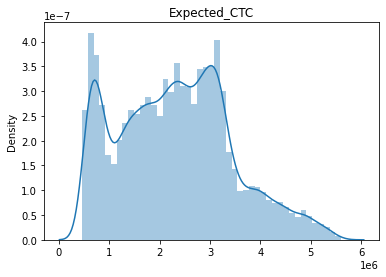

In [57]:
sns.distplot(x=hd_lr.Expected_CTC,kde=True).set(title='Expected_CTC');     #density plot of expected ctc


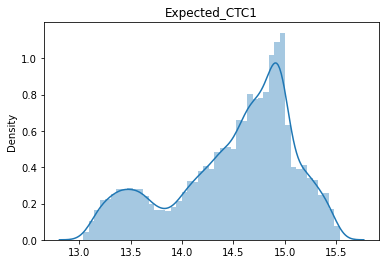

In [58]:
sns.distplot(x=hd_lr.Expected_CTC1,kde=True).set(title='Expected_CTC1');  #density plot of log of expected_ctc


In [59]:
hd_lr = hd_lr.drop(['Expected_CTC'],axis=1)
hd_lr.head()   

,Total_Experience,Total_Experience_in_field_applied,No_Of_Companies_worked,Certifications,International_degree_any,Education_Grad,Education_PG,Education_Under_Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Inhand_Offer_Y,Department_Top_Management,Department_White_Collar,Designation_CA,Designation_Consultant,Designation_Data_Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing_Manager,Designation_Medical_Officer,Designation_Network_Engineer,Designation_Others,Designation_Product_Manager,Designation_Research_Analyst,Designation_Research_Scientist,Designation_Scientist,Designation_Software_Developer,Designation_Sr_Manager,Designation_Web_Designer,Expected_CTC1
1,23,14,2,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15.146221
2,21,12,5,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14.956967
3,15,8,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14.774414
4,10,5,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,14.613644
5,16,3,5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,15.324550


In [60]:
hd_lr.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied',
       'No_Of_Companies_worked', 'Certifications', 'International_degree_any',
       'Education_Grad', 'Education_PG', 'Education_Under_Grad',
       'Last_Appraisal_Rating_B', 'Last_Appraisal_Rating_C',
       'Last_Appraisal_Rating_D', 'Last_Appraisal_Rating_Key_Performer',
       'Inhand_Offer_Y', 'Department_Top_Management',
       'Department_White_Collar', 'Designation_CA', 'Designation_Consultant',
       'Designation_Data_Analyst', 'Designation_Director', 'Designation_HR',
       'Designation_Manager', 'Designation_Marketing_Manager',
       'Designation_Medical_Officer', 'Designation_Network_Engineer',
       'Designation_Others', 'Designation_Product_Manager',
       'Designation_Research_Analyst', 'Designation_Research_Scientist',
       'Designation_Scientist', 'Designation_Software_Developer',
       'Designation_Sr_Manager', 'Designation_Web_Designer', 'Expected_CTC1'],
      dtype='object')

In [61]:
hd_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24092 entries, 1 to 24999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Total_Experience                     24092 non-null  int64   
 1   Total_Experience_in_field_applied    24092 non-null  int64   
 2   No_Of_Companies_worked               24092 non-null  category
 3   Certifications                       24092 non-null  category
 4   International_degree_any             24092 non-null  category
 5   Education_Grad                       24092 non-null  uint8   
 6   Education_PG                         24092 non-null  uint8   
 7   Education_Under_Grad                 24092 non-null  uint8   
 8   Last_Appraisal_Rating_B              24092 non-null  uint8   
 9   Last_Appraisal_Rating_C              24092 non-null  uint8   
 10  Last_Appraisal_Rating_D              24092 non-null  uint8   
 11  Last_Appraisal_

In [62]:
hd_lr['No_Of_Companies_worked'] =hd_lr['No_Of_Companies_worked'].astype(int)
hd_lr['Certifications'] = hd_lr['Certifications'].astype(int)
hd_lr['International_degree_any'] = hd_lr['International_degree_any'].astype(int)
hd_lr['Expected_CTC1'] = hd_lr['Expected_CTC1'].astype(int)
hd_lr.dtypes

Total_Experience                       int64
Total_Experience_in_field_applied      int64
No_Of_Companies_worked                 int32
Certifications                         int32
International_degree_any               int32
Education_Grad                         uint8
Education_PG                           uint8
Education_Under_Grad                   uint8
Last_Appraisal_Rating_B                uint8
Last_Appraisal_Rating_C                uint8
Last_Appraisal_Rating_D                uint8
Last_Appraisal_Rating_Key_Performer    uint8
Inhand_Offer_Y                         uint8
Department_Top_Management              uint8
Department_White_Collar                uint8
Designation_CA                         uint8
Designation_Consultant                 uint8
Designation_Data_Analyst               uint8
Designation_Director                   uint8
Designation_HR                         uint8
Designation_Manager                    uint8
Designation_Marketing_Manager          uint8
Designatio

In [63]:
#check for Multicolinearity 
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [64]:
import statsmodels.formula.api as SM
vif_cal(input_data=hd_lr[['Total_Experience', 'Total_Experience_in_field_applied',
       'No_Of_Companies_worked', 'Certifications', 'International_degree_any',
       'Education_Grad', 'Education_PG', 'Education_Under_Grad',
       'Last_Appraisal_Rating_B', 'Last_Appraisal_Rating_C',
       'Last_Appraisal_Rating_D', 'Last_Appraisal_Rating_Key_Performer',
       'Inhand_Offer_Y', 'Department_Top_Management',
       'Department_White_Collar', 'Designation_CA', 'Designation_Consultant',
       'Designation_Data_Analyst', 'Designation_Director', 'Designation_HR',
       'Designation_Manager', 'Designation_Marketing_Manager',
       'Designation_Medical_Officer', 'Designation_Network_Engineer',
       'Designation_Others', 'Designation_Product_Manager',
       'Designation_Research_Analyst', 'Designation_Research_Scientist',
       'Designation_Scientist', 'Designation_Software_Developer',
       'Designation_Sr_Manager', 'Designation_Web_Designer']])

Total_Experience  VIF =  1.79
Total_Experience_in_field_applied  VIF =  1.64
No_Of_Companies_worked  VIF =  1.11
Certifications  VIF =  1.51
International_degree_any  VIF =  1.01
Education_Grad  VIF =  1.57
Education_PG  VIF =  1.59
Education_Under_Grad  VIF =  2.14
Last_Appraisal_Rating_B  VIF =  1.7
Last_Appraisal_Rating_C  VIF =  1.63
Last_Appraisal_Rating_D  VIF =  1.64
Last_Appraisal_Rating_Key_Performer  VIF =  1.84
Inhand_Offer_Y  VIF =  1.32
Department_Top_Management  VIF =  1.23
Department_White_Collar  VIF =  1.22
Designation_CA  VIF =  1.42
Designation_Consultant  VIF =  1.89
Designation_Data_Analyst  VIF =  1.86
Designation_Director  VIF =  1.45
Designation_HR  VIF =  1.91
Designation_Manager  VIF =  1.9
Designation_Marketing_Manager  VIF =  1.88
Designation_Medical_Officer  VIF =  1.6
Designation_Network_Engineer  VIF =  1.49
Designation_Others  VIF =  2.92
Designation_Product_Manager  VIF =  1.9
Designation_Research_Analyst  VIF =  1.86
Designation_Research_Scientist  VIF

#### Model 1 : All Features

In [65]:
f_1='Expected_CTC1~Total_Experience+Total_Experience_in_field_applied+No_Of_Companies_worked+Certifications+International_degree_any+Education_Grad+Education_PG+Education_Under_Grad+Last_Appraisal_Rating_B+Last_Appraisal_Rating_C+Last_Appraisal_Rating_D+Last_Appraisal_Rating_Key_Performer+Inhand_Offer_Y+Department_Top_Management+Department_White_Collar+Designation_CA+Designation_Consultant+Designation_Data_Analyst+Designation_Director+Designation_HR+Designation_Manager+Designation_Marketing_Manager+Designation_Medical_Officer+Designation_Network_Engineer+Designation_Others+Designation_Product_Manager+Designation_Research_Analyst+Designation_Research_Scientist+Designation_Scientist+Designation_Software_Developer+Designation_Sr_Manager+Designation_Web_Designer'

In [66]:
model_1 = SM.ols(f_1,data=hd_lr).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Expected_CTC1   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1370.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:55:01   Log-Likelihood:                -9960.0
No. Observations:               24092   AIC:                         1.999e+04
Df Residuals:                   24059   BIC:                         2.025e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.4250      0.014    993.702      0.000      13.399      13.451
Total_Experience                        0.0581      0.000    132.449      0.000       0.057       0.059
Total_Experience_in_field_applied       0.0001      0.001      0.276      0.782      -0.001       0.001
No_Of_Companies_worked                  0.0172      0.002     10.918      0.000       0.014       0.020
Certifications                         -0.0024      0.002     -1.011      0.312      -0.007       0.002
International_degree_any                0.0236      0.008      2.779      0.005       0.007       0.040
Education_Grad                         -0.4518      0.007    -66.042      0.000      -0.465      -0.438
Education_PG                           -0.1761      0.007    -25.728      0.000      -0.190      -0.163
Education_Under_Grad                   -0.4960      0.008    -61.975      0.000      -0.512      -0.480
Last_Appraisal_Rating_B                -0.0586      0.007     -7.985      0.000      -0.073      -0.044
Last_Appraisal_Rating_C                -0.1196      0.008    -15.888      0.000      -0.134      -0.105
Last_Appraisal_Rating_D                -0.1014      0.007    -13.546      0.000      -0.116      -0.087
Last_Appraisal_Rating_Key_Performer     0.0712      0.008      8.430      0.000       0.055       0.088
Inhand_Offer_Y                          0.0033      0.006      0.563      0.573      -0.008       0.015
Department_Top_Management               0.1426      0.010     13.700      0.000       0.122       0.163
Department_White_Collar                 0.0810      0.006     14.164      0.000       0.070       0.092
Designation_CA                          0.0180      0.017      1.091      0.275      -0.014       0.050
Designation_Consultant                 -0.0144      0.013     -1.106      0.269      -0.040       0.011
Designation_Data_Analyst                0.0006      0.013      0.044      0.965      -0.025       0.026
Designation_Director                   -0.0041      0.016     -0.253      0.801      -0.036       0.028
Designation_HR                         -0.0042      0.013     -0.328      0.743      -0.030       0.021
Designation_Manager                    -0.0177      0.013     -1.367      0.172      -0.043       0.008
Designation_Marketing_Manager          -0.0083      0.013     -0.640      0.522      -0.034       0.017
Designation_Medical_Officer            -0.0107      0.015     -0.729      0.466      -0.039       0.018
Designation_Network_Engineer           -0.0160      0.016     -1.032      0.302      -0.046       0.014
Designation_Others                     -0.0053      0.011     -0.483      0.629      -0.027       0.016
Designation_Product_Manager            -0.0009      0.013     -0.07

#### Model 2 : Drop features



In [67]:
f_2='Expected_CTC1~Total_Experience+Total_Experience_in_field_applied+No_Of_Companies_worked+Certifications+International_degree_any+Education_Grad+Education_PG+Education_Under_Grad+Last_Appraisal_Rating_B+Last_Appraisal_Rating_C+Last_Appraisal_Rating_D+Last_Appraisal_Rating_Key_Performer+Inhand_Offer_Y+Department_Top_Management+Department_White_Collar+Designation_CA+Designation_Consultant+Designation_Director+Designation_HR+Designation_Manager+Designation_Marketing_Manager+Designation_Medical_Officer+Designation_Network_Engineer+Designation_Others+Designation_Product_Manager+Designation_Research_Analyst+Designation_Research_Scientist+Designation_Scientist+Designation_Software_Developer+Designation_Sr_Manager+Designation_Web_Designer'

In [68]:
model_2 = SM.ols(f_2,data=hd_lr).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Expected_CTC1   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1414.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:55:02   Log-Likelihood:                -9960.0
No. Observations:               24092   AIC:                         1.998e+04
Df Residuals:                   24060   BIC:                         2.024e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.4253      0.012   1131.715      0.000      13.402      13.449
Total_Experience                        0.0581      0.000    132.458      0.000       0.057       0.059
Total_Experience_in_field_applied       0.0001      0.001      0.276      0.783      -0.001       0.001
No_Of_Companies_worked                  0.0172      0.002     10.919      0.000       0.014       0.020
Certifications                         -0.0024      0.002     -1.010      0.312      -0.007       0.002
International_degree_any                0.0236      0.008      2.779      0.005       0.007       0.040
Education_Grad                         -0.4518      0.007    -66.045      0.000      -0.465      -0.438
Education_PG                           -0.1761      0.007    -25.729      0.000      -0.190      -0.163
Education_Under_Grad                   -0.4960      0.008    -61.978      0.000      -0.512      -0.480
Last_Appraisal_Rating_B                -0.0586      0.007     -7.986      0.000      -0.073      -0.044
Last_Appraisal_Rating_C                -0.1196      0.008    -15.888      0.000      -0.134      -0.105
Last_Appraisal_Rating_D                -0.1014      0.007    -13.547      0.000      -0.116      -0.087
Last_Appraisal_Rating_Key_Performer     0.0712      0.008      8.431      0.000       0.055       0.088
Inhand_Offer_Y                          0.0033      0.006      0.563      0.574      -0.008       0.015
Department_Top_Management               0.1426      0.010     13.700      0.000       0.122       0.163
Department_White_Collar                 0.0810      0.006     14.164      0.000       0.070       0.092
Designation_CA                          0.0178      0.015      1.167      0.243      -0.012       0.048
Designation_Consultant                 -0.0147      0.011     -1.301      0.193      -0.037       0.007
Designation_Director                   -0.0044      0.015     -0.295      0.768      -0.033       0.025
Designation_HR                         -0.0045      0.011     -0.405      0.686      -0.026       0.017
Designation_Manager                    -0.0180      0.011     -1.604      0.109      -0.040       0.004
Designation_Marketing_Manager          -0.0086      0.011     -0.762      0.446      -0.031       0.014
Designation_Medical_Officer            -0.0110      0.013     -0.835      0.404      -0.037       0.015
Designation_Network_Engineer           -0.0163      0.014     -1.156      0.248      -0.044       0.011
Designation_Others                     -0.0056      0.009     -0.630      0.528      -0.023       0.012
Designation_Product_Manager            -0.0012      0.011     -0.107      0.915      -0.023       0.021
Designation_Research_Analyst           -0.0123      0.011     -1.08

In [69]:
f_3='Expected_CTC1~Total_Experience+No_Of_Companies_worked+Certifications+International_degree_any+Education_Grad+Education_PG+Education_Under_Grad+Last_Appraisal_Rating_B+Last_Appraisal_Rating_C+Last_Appraisal_Rating_D+Last_Appraisal_Rating_Key_Performer+Inhand_Offer_Y+Department_Top_Management+Department_White_Collar+Designation_CA+Designation_Consultant+Designation_Director+Designation_HR+Designation_Manager+Designation_Marketing_Manager+Designation_Medical_Officer+Designation_Network_Engineer+Designation_Others+Designation_Product_Manager+Designation_Research_Analyst+Designation_Research_Scientist+Designation_Scientist+Designation_Software_Developer+Designation_Sr_Manager+Designation_Web_Designer'

In [70]:
model_3 = SM.ols(f_3,data=hd_lr).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Expected_CTC1   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:55:02   Log-Likelihood:                -9960.1
No. Observations:               24092   AIC:                         1.998e+04
Df Residuals:                   24061   BIC:                         2.023e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.4253      0.012   1131.788      0.000      13.402      13.449
Total_Experience                        0.0582      0.000    165.820      0.000       0.057       0.059
No_Of_Companies_worked                  0.0172      0.002     10.916      0.000       0.014       0.020
Certifications                         -0.0024      0.002     -1.011      0.312      -0.007       0.002
International_degree_any                0.0236      0.008      2.775      0.006       0.007       0.040
Education_Grad                         -0.4519      0.007    -66.048      0.000      -0.465      -0.438
Education_PG                           -0.1761      0.007    -25.730      0.000      -0.190      -0.163
Education_Under_Grad                   -0.4960      0.008    -61.979      0.000      -0.512      -0.480
Last_Appraisal_Rating_B                -0.0586      0.007     -7.987      0.000      -0.073      -0.044
Last_Appraisal_Rating_C                -0.1196      0.008    -15.889      0.000      -0.134      -0.105
Last_Appraisal_Rating_D                -0.1014      0.007    -13.548      0.000      -0.116      -0.087
Last_Appraisal_Rating_Key_Performer     0.0713      0.008      8.433      0.000       0.055       0.088
Inhand_Offer_Y                          0.0033      0.006      0.560      0.576      -0.008       0.015
Department_Top_Management               0.1426      0.010     13.701      0.000       0.122       0.163
Department_White_Collar                 0.0810      0.006     14.164      0.000       0.070       0.092
Designation_CA                          0.0178      0.015      1.169      0.243      -0.012       0.048
Designation_Consultant                 -0.0147      0.011     -1.301      0.193      -0.037       0.007
Designation_Director                   -0.0044      0.015     -0.298      0.766      -0.033       0.025
Designation_HR                         -0.0046      0.011     -0.409      0.683      -0.026       0.017
Designation_Manager                    -0.0180      0.011     -1.606      0.108      -0.040       0.004
Designation_Marketing_Manager          -0.0086      0.011     -0.763      0.445      -0.031       0.014
Designation_Medical_Officer            -0.0109      0.013     -0.833      0.405      -0.037       0.015
Designation_Network_Engineer           -0.0163      0.014     -1.156      0.248      -0.044       0.011
Designation_Others                     -0.0056      0.009     -0.631      0.528      -0.023       0.012
Designation_Product_Manager            -0.0012      0.011     -0.108      0.914      -0.023       0.021
Designation_Research_Analyst           -0.0123      0.011     -1.083      0.279      -0.034       0.010
Designation_Research_Scientist          0.0075      0.017      0.43

In [71]:
f_4='Expected_CTC1~Total_Experience+No_Of_Companies_worked+Certifications+International_degree_any+Education_Grad+Education_PG+Education_Under_Grad+Last_Appraisal_Rating_B+Last_Appraisal_Rating_C+Last_Appraisal_Rating_D+Last_Appraisal_Rating_Key_Performer+Inhand_Offer_Y+Department_Top_Management+Department_White_Collar'

In [72]:
model_4 = SM.ols(f_4,data=hd_lr).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Expected_CTC1   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3132.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:55:02   Log-Likelihood:                -9965.4
No. Observations:               24092   AIC:                         1.996e+04
Df Residuals:                   24077   BIC:                         2.008e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.4182      0.010   1321.843      0.000      13.398      13.438
Total_Experience                        0.0582      0.000    166.735      0.000       0.058       0.059
No_Of_Companies_worked                  0.0172      0.002     10.946      0.000       0.014       0.020
Certifications                         -0.0026      0.002     -1.092      0.275      -0.007       0.002
International_degree_any                0.0237      0.008      2.797      0.005       0.007       0.040
Education_Grad                         -0.4517      0.007    -66.124      0.000      -0.465      -0.438
Education_PG                           -0.1759      0.007    -25.735      0.000      -0.189      -0.162
Education_Under_Grad                   -0.4957      0.008    -62.492      0.000      -0.511      -0.480
Last_Appraisal_Rating_B                -0.0584      0.007     -7.963      0.000      -0.073      -0.044
Last_Appraisal_Rating_C                -0.1195      0.008    -15.884      0.000      -0.134      -0.105
Last_Appraisal_Rating_D                -0.1013      0.007    -13.538      0.000      -0.116      -0.087
Last_Appraisal_Rating_Key_Performer     0.0714      0.008      8.487      0.000       0.055       0.088
Inhand_Offer_Y                          0.0030      0.006      0.522      0.602      -0.008       0.014
Department_Top_Management               0.1427      0.010     13.721      0.000       0.122       0.163
Department_White_Collar                 0.0810      0.006     14.184      0.000       0.070       0.092
==============================================================================
Omnibus:                      699.304   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.753
Skew:                           0.101   Prob(JB):                     1.03e-79
Kurtosis:                       2.433   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
f_5='Expected_CTC1~Total_Experience+No_Of_Companies_worked+Certifications+International_degree_any+Education_Grad+Education_PG+Education_Under_Grad+Last_Appraisal_Rating_B+Last_Appraisal_Rating_C+Last_Appraisal_Rating_D+Last_Appraisal_Rating_Key_Performer+Department_Top_Management+Department_White_Collar'

In [74]:
model_5 = SM.ols(f_5,data=hd_lr).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Expected_CTC1   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3373.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:55:03   Log-Likelihood:                -9965.6
No. Observations:               24092   AIC:                         1.996e+04
Df Residuals:                   24078   BIC:                         2.007e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.4189      0.010   1335.324      0.000      13.399      13.439
Total_Experience                        0.0582      0.000    166.740      0.000       0.058       0.059
No_Of_Companies_worked                  0.0172      0.002     10.942      0.000       0.014       0.020
Certifications                         -0.0025      0.002     -1.075      0.282      -0.007       0.002
International_degree_any                0.0238      0.008      2.802      0.005       0.007       0.040
Education_Grad                         -0.4517      0.007    -66.134      0.000      -0.465      -0.438
Education_PG                           -0.1759      0.007    -25.742      0.000      -0.189      -0.162
Education_Under_Grad                   -0.4958      0.008    -62.529      0.000      -0.511      -0.480
Last_Appraisal_Rating_B                -0.0582      0.007     -7.948      0.000      -0.073      -0.044
Last_Appraisal_Rating_C                -0.1195      0.008    -15.883      0.000      -0.134      -0.105
Last_Appraisal_Rating_D                -0.1013      0.007    -13.541      0.000      -0.116      -0.087
Last_Appraisal_Rating_Key_Performer     0.0731      0.008      9.375      0.000       0.058       0.088
Department_Top_Management               0.1426      0.010     13.712      0.000       0.122       0.163
Department_White_Collar                 0.0809      0.006     14.175      0.000       0.070       0.092
==============================================================================
Omnibus:                      698.107   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.552
Skew:                           0.102   Prob(JB):                     1.14e-79
Kurtosis:                       2.434   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
f_6='Expected_CTC1~Total_Experience+No_Of_Companies_worked+International_degree_any+Education_Grad+Education_PG+Education_Under_Grad+Last_Appraisal_Rating_B+Last_Appraisal_Rating_C+Last_Appraisal_Rating_D+Last_Appraisal_Rating_Key_Performer+Department_Top_Management+Department_White_Collar'

In [76]:
model_6 = SM.ols(f_6,data=hd_lr).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Expected_CTC1   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3654.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:55:03   Log-Likelihood:                -9966.2
No. Observations:               24092   AIC:                         1.996e+04
Df Residuals:                   24079   BIC:                         2.006e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.4189      0.010   1335.327      0.000      13.399      13.439
Total_Experience                        0.0582      0.000    166.739      0.000       0.058       0.059
No_Of_Companies_worked                  0.0172      0.002     10.939      0.000       0.014       0.020
International_degree_any                0.0237      0.008      2.790      0.005       0.007       0.040
Education_Grad                         -0.4533      0.007    -67.908      0.000      -0.466      -0.440
Education_PG                           -0.1776      0.007    -26.752      0.000      -0.191      -0.165
Education_Under_Grad                   -0.5004      0.007    -74.930      0.000      -0.514      -0.487
Last_Appraisal_Rating_B                -0.0581      0.007     -7.941      0.000      -0.072      -0.044
Last_Appraisal_Rating_C                -0.1195      0.008    -15.881      0.000      -0.134      -0.105
Last_Appraisal_Rating_D                -0.1014      0.007    -13.544      0.000      -0.116      -0.087
Last_Appraisal_Rating_Key_Performer     0.0732      0.008      9.385      0.000       0.058       0.088
Department_Top_Management               0.1426      0.010     13.710      0.000       0.122       0.163
Department_White_Collar                 0.0810      0.006     14.188      0.000       0.070       0.092
==============================================================================
Omnibus:                      697.555   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.404
Skew:                           0.102   Prob(JB):                     1.22e-79
Kurtosis:                       2.434   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
columns=['Total_Experience','No_Of_Companies_worked','International_degree_any','Education_Grad','Education_PG',
         'Education_Under_Grad','Last_Appraisal_Rating_B','Last_Appraisal_Rating_C','Last_Appraisal_Rating_D',
         'Last_Appraisal_Rating_Key_Performer','Department_Top_Management','Department_White_Collar']

In [78]:
X=hd_lr[columns]
Y=hd_lr["Expected_CTC1"]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [81]:
X_train.shape

(16864, 12)

In [82]:
X_test.shape

(7228, 12)

In [83]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [84]:
#lr_model.fit(X_train,Y_train)

In [85]:
model_6 = lr_model.fit(X_train[['Total_Experience','No_Of_Companies_worked','International_degree_any','Education_Grad','Education_PG','Education_Under_Grad','Last_Appraisal_Rating_B','Last_Appraisal_Rating_C','Last_Appraisal_Rating_D','Last_Appraisal_Rating_Key_Performer','Department_Top_Management','Department_White_Collar']],Y_train)


In [86]:
#Training Data Prediction

model_6_pred_train = model_6.predict(X_train[['Total_Experience','No_Of_Companies_worked','International_degree_any','Education_Grad','Education_PG','Education_Under_Grad','Last_Appraisal_Rating_B','Last_Appraisal_Rating_C','Last_Appraisal_Rating_D','Last_Appraisal_Rating_Key_Performer','Department_Top_Management','Department_White_Collar']])

In [87]:
#Test Data Prediction

model_6_pred_test = model_6.predict(X_test[['Total_Experience','No_Of_Companies_worked','International_degree_any','Education_Grad','Education_PG','Education_Under_Grad','Last_Appraisal_Rating_B','Last_Appraisal_Rating_C','Last_Appraisal_Rating_D','Last_Appraisal_Rating_Key_Performer','Department_Top_Management','Department_White_Collar']])


In [88]:
print('Training Data RMSE of model_6:',mean_squared_error(Y_train,model_6_pred_train,squared=False))
print('Test Data RMSE of model_6:',mean_squared_error(Y_test,model_6_pred_test,squared=False))


Training Data RMSE of model_6: 0.36527661509126635
Test Data RMSE of model_6: 0.3675847721832075


In [89]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
model_6_pred_test = model_6.predict(X_test[['Total_Experience','No_Of_Companies_worked','International_degree_any','Education_Grad','Education_PG','Education_Under_Grad','Last_Appraisal_Rating_B','Last_Appraisal_Rating_C','Last_Appraisal_Rating_D','Last_Appraisal_Rating_Key_Performer','Department_Top_Management','Department_White_Collar']])
mae=metrics.mean_absolute_error(Y_test,model_6_pred_test)
mape=mean_absolute_percentage_error(Y_test,model_6_pred_test)
mse=metrics.mean_squared_error(Y_test,model_6_pred_test)
r2=metrics.r2_score(Y_test,model_6_pred_test)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 0.3056053134720773
MAPE is 0.021817694137249467
MSE is 0.13511856474098055
R2 score is 0.6399058041807407
RMSE score is 0.3675847721832075


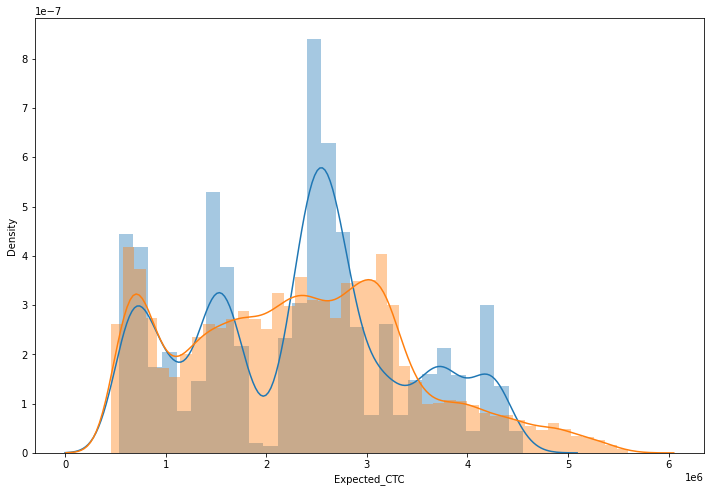

In [90]:
plt.figure(figsize=(12,8))
sns.distplot(y_predrf)
sns.distplot(hd_org['Expected_CTC']);